<a href="https://colab.research.google.com/github/rajeshaiml/machine-learning/blob/master/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Conv2D, Flatten, Dense, Dropout, GlobalMaxPool2D

In [3]:
#Import the CIFAR data
from tensorflow.keras.datasets import cifar10

In [4]:
data=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
x_train, x_test = x_train/255, x_test/255

In [8]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [9]:
y_test.shape

(10000,)

In [10]:
k=len(set(y_train))

In [11]:
s=x_train[0].shape

In [65]:
#Build the model using functional API
i=Input(shape=s) 
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.5)(x)
x=Dense(1024, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)

model=Model(i,x)


AttributeError: ignored

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)             

In [19]:
#Fit the model
model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
r=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6547 - accuracy: 0.7663 - val_loss: 0.8222 - val_accuracy: 0.7183
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6400 - accuracy: 0.7722 - val_loss: 0.8096 - val_accuracy: 0.7230
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6223 - accuracy: 0.7803 - val_loss: 0.8104 - val_accuracy: 0.7282
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6086 - accuracy: 0.7837 - val_loss: 0.8176 - val_accuracy: 0.7213
Epoch 5/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6006 - accuracy: 0.7878 - val_loss: 0.8226 - val_accuracy: 0.7186
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5794 - accuracy: 0.7944 - val_loss: 0.8025 - val_accuracy: 0.7225
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5665 - accuracy: 0.7974 - val_loss: 0.8219 - val_ac

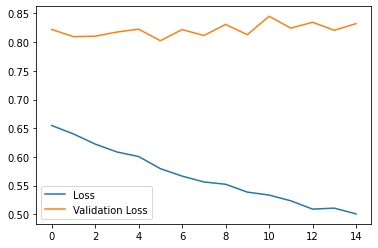

In [20]:
#plot the loss
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

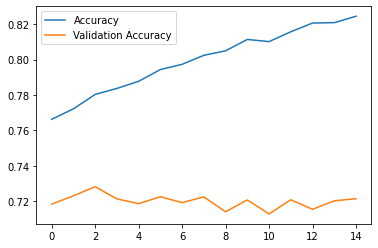

In [21]:
#plot the accuracy
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

In [26]:
print(model.predict(x_test).argmax(axis=1))

[3 8 8 ... 5 0 7]


In [56]:
#misclassified points #2786
y_pred=model.predict(x_test).argmax(axis=1)
c=0
actual_pred=[]
for i in range(0,len(y_test)):
  if y_test[i] != y_pred[i]:
    print('Index: {}, Actual value is {} and the predicted values is {}'.format(i,y_test[i],y_pred[i]))
    c+=1
    actual_pred.append((y_test[i],y_pred[i]))
print('Total misclassified values: ',c)    


Index: 9, Actual value is 1 and the predicted values is 9
Index: 17, Actual value is 7 and the predicted values is 3
Index: 22, Actual value is 4 and the predicted values is 0
Index: 24, Actual value is 5 and the predicted values is 4
Index: 33, Actual value is 5 and the predicted values is 3
Index: 35, Actual value is 2 and the predicted values is 1
Index: 36, Actual value is 4 and the predicted values is 7
Index: 46, Actual value is 3 and the predicted values is 5
Index: 52, Actual value is 0 and the predicted values is 3
Index: 57, Actual value is 7 and the predicted values is 6
Index: 58, Actual value is 4 and the predicted values is 5
Index: 59, Actual value is 6 and the predicted values is 3
Index: 61, Actual value is 3 and the predicted values is 5
Index: 65, Actual value is 2 and the predicted values is 6
Index: 68, Actual value is 3 and the predicted values is 5
Index: 70, Actual value is 2 and the predicted values is 4
Index: 71, Actual value is 6 and the predicted values is 

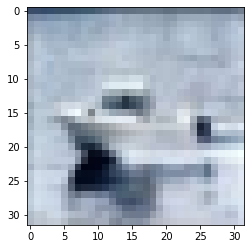

In [59]:
plt.imshow(x_test[9986])

In [82]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

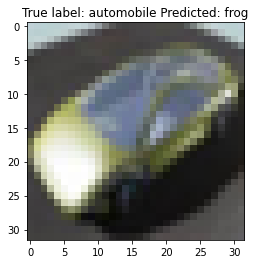

In [83]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [74]:
from sklearn.metrics import confusion_matrix
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)

In [67]:
cm

array([[733,  17,  38,  27,  25,  10,  12,  12,  80,  46],
       [ 16, 804,   1,   7,   5,   4,  18,   2,  31, 112],
       [ 50,   5, 574,  73, 107,  59,  78,  21,  24,   9],
       [ 15,   5,  42, 550,  84, 172,  68,  26,  15,  23],
       [ 15,   1,  41,  84, 708,  34,  36,  57,  19,   5],
       [ 10,   1,  39, 184,  60, 602,  35,  43,  12,  14],
       [  6,   2,  22,  66,  46,  11, 826,   6,   7,   8],
       [ 12,   2,  21,  51,  73,  71,   8, 734,   4,  24],
       [ 43,  20,  13,  16,  10,   8,   9,   4, 850,  27],
       [ 23,  66,   3,  19,   1,   9,   8,  14,  24, 833]])

In [70]:
 cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 print(cm)

[[0.733 0.017 0.038 0.027 0.025 0.01  0.012 0.012 0.08  0.046]
 [0.016 0.804 0.001 0.007 0.005 0.004 0.018 0.002 0.031 0.112]
 [0.05  0.005 0.574 0.073 0.107 0.059 0.078 0.021 0.024 0.009]
 [0.015 0.005 0.042 0.55  0.084 0.172 0.068 0.026 0.015 0.023]
 [0.015 0.001 0.041 0.084 0.708 0.034 0.036 0.057 0.019 0.005]
 [0.01  0.001 0.039 0.184 0.06  0.602 0.035 0.043 0.012 0.014]
 [0.006 0.002 0.022 0.066 0.046 0.011 0.826 0.006 0.007 0.008]
 [0.012 0.002 0.021 0.051 0.073 0.071 0.008 0.734 0.004 0.024]
 [0.043 0.02  0.013 0.016 0.01  0.008 0.009 0.004 0.85  0.027]
 [0.023 0.066 0.003 0.019 0.001 0.009 0.008 0.014 0.024 0.833]]


Text(0.5, 1.0, 'Confustion Matrix')

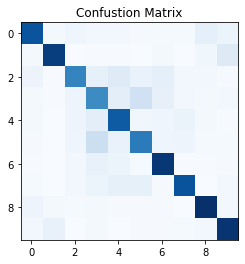

In [81]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confustion Matrix')
#plt.colorbar()

Confusion matrix, without normalization
[[733  17  38  27  25  10  12  12  80  46]
 [ 16 804   1   7   5   4  18   2  31 112]
 [ 50   5 574  73 107  59  78  21  24   9]
 [ 15   5  42 550  84 172  68  26  15  23]
 [ 15   1  41  84 708  34  36  57  19   5]
 [ 10   1  39 184  60 602  35  43  12  14]
 [  6   2  22  66  46  11 826   6   7   8]
 [ 12   2  21  51  73  71   8 734   4  24]
 [ 43  20  13  16  10   8   9   4 850  27]
 [ 23  66   3  19   1   9   8  14  24 833]]


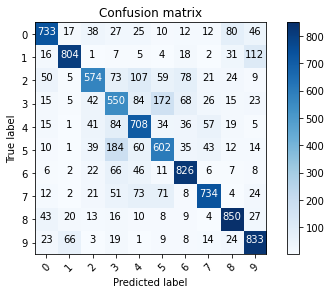

In [84]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

